In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [54]:
data1 = pd.read_csv('test_01.csv', sep = ';')
data2 = pd.read_csv('test_02.csv', sep = ';')

In [55]:
time_differences = np.diff(data1['Time'])
average_time_step = np.mean(time_differences)
sampling_rate = 1 / average_time_step

print(f"Sampling Rate: {sampling_rate} Hz")

Sampling Rate: 10000.0 Hz


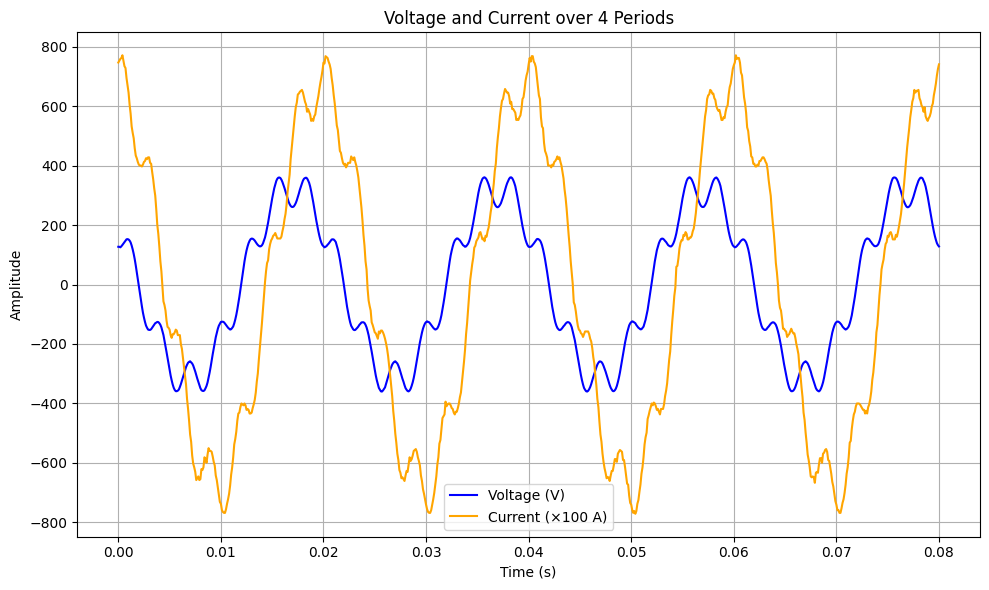

In [56]:
def plot(data):
    time = data['Time']
    voltage = data['Voltage']
    current = data['Current']

    current_scaled = current * 100
    time_mask = time <= 0.08


    plt.figure(figsize=(10, 6))
    plt.plot(time[time_mask], voltage[time_mask], label='Voltage (V)', color='blue')
    plt.plot(time[time_mask], current_scaled[time_mask], label='Current (×100 A)', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Voltage and Current over 4 Periods')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot(data1)

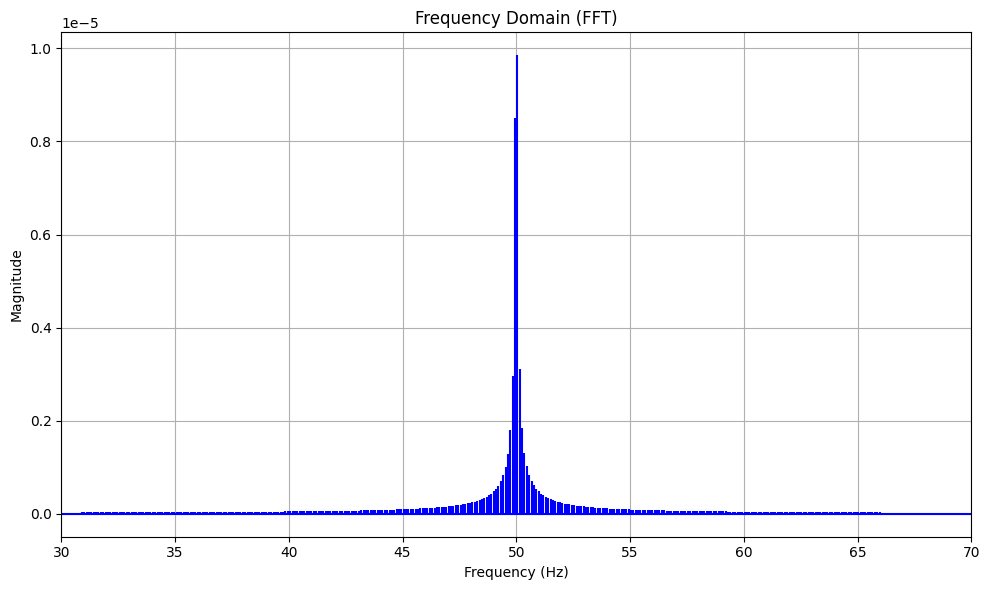

In [57]:
def harmonic_spectrum(data):
    voltage = data['Voltage']

    voltage_fft = fft(voltage)
    voltage_norm = voltage_fft / np.linalg.norm(voltage_fft)

    frequency_vol = fftfreq(len(voltage_norm), d=1/sampling_rate)
    magnitude_vol = np.abs(voltage_norm)

    plt.figure(figsize=(10, 6))
    plt.stem(frequency_vol[:len(frequency_vol)//2], magnitude_vol[:len(magnitude_vol)//2]/(len(magnitude_vol)/2), 'b', markerfmt=" ", basefmt="-b")
    plt.title("Frequency Domain (FFT)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.xlim(30, 70)
    plt.grid()
    plt.tight_layout()
    plt.show()

s = harmonic_spectrum(data1)

In [58]:
def compute_power(data):
    voltage = data['Voltage']
    current = data['Current']

    P = np.mean(voltage * current * np.cos(np.angle(voltage) - np.angle(current)))
    Q = np.mean(voltage * current * np.sin(np.angle(voltage) - np.angle(current)))
    S = np.mean(voltage * current)
    PF = P / S


    print(f"Active Power (P): {P:.2f} W")
    print(f"Reactive Power (Q): {Q:.6f} VAR")
    print(f"Apparent Power (S): {S:.2f} VA")
    print(f"Power Factor (PF): {PF:.2f}")

compute_power(data1)

Active Power (P): 901.77 W
Reactive Power (Q): 0.000000 VAR
Apparent Power (S): 724.29 VA
Power Factor (PF): 1.25


In [ ]:
# Sampling rate is 10000 Hz, that means that we have data every 0.0001 seconds
# Frequency is 50 Hz
# Reactive power is 0, because angle is 0 degrees, so cos(0) = 1  